# Vehicle routing and its optimization (work in progress)

In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from pylab import *

## DUO assignment

The default routing principle is *Dynamic User Optimum (DUO)* with slight modification. DUO means that each vehicle basically chooses the minimum travel time path based on the current instantaneous travel time. Therefore, they are selfish and this is usually not optimal for the society.

simulation setting:
 scenario name: 
 simulation duration:	 1000 s
 number of vehicles:	 800 veh
 total road length:	 4000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 200
 number of platoons:	 160
 number of links:	 4
 number of nodes:	 4
 setup time:		 0.00 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      200 vehs|  10.5 m/s|     0.06 s
     995 s|        0 vehs|   0.0 m/s|     0.06 s
 simulation finished
results:
 average speed:	 11.3 m/s
 number of completed trips:	 800 / 800
 average travel time of trips:	 215.5 s
 average delay of trips:	 115.5 s
 delay ratio:			 0.536
Total travel time: 172425.0 s
Route 1 users: 490
Route 2 users: 310
 drawing trajectories in consecutive links...


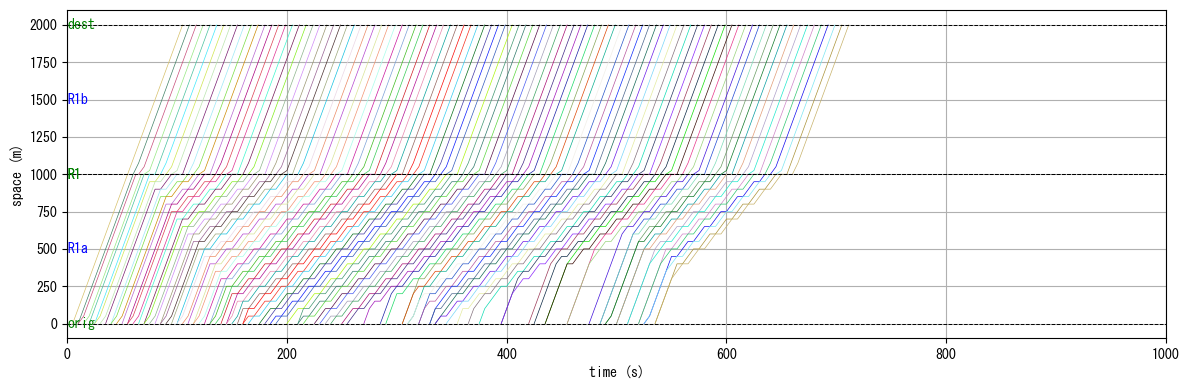

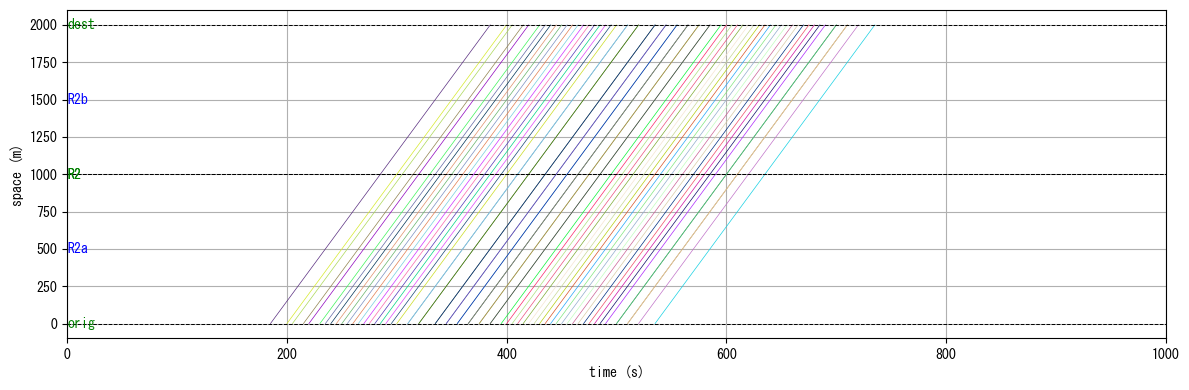

In [6]:
from uxsim import *

# Define the main simulation
# Units are standardized to seconds (s) and meters (m)
W = World(
    name="",    # Scenario name
    deltan=5,   # Simulation aggregation unit delta n
    tmax=1000,  # Total simulation time (s)
    print_mode=1, save_mode=1, show_mode=1,    # Various options
    random_seed=0,    # Set the random seed
    duo_update_time=60
)

# Define the scenario
#network configuration
# O -- R1
# |     |
# R2 -- D
# route with R1 is faster but narrower than R2

W.addNode("orig", 0, 0)
W.addNode("R1", 1, 0)
W.addNode("R2", 0, 1)
W.addNode("dest", 1, 1)
W.addLink("R1a", "orig", "R1", length=1000, free_flow_speed=20, number_of_lanes=2)
W.addLink("R1b", "R1", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("R2a", "orig", "R2", length=1000, free_flow_speed=10, number_of_lanes=2)
W.addLink("R2b", "R2", "dest", length=1000, free_flow_speed=10, number_of_lanes=2)
route_R1 = ["R1a", "R1b"]
route_R2 = ["R2a", "R2b"]
W.adddemand("orig", "dest", 0, 500, 0.8*2)

# Run the simulation to the end
W.exec_simulation()

# Print summary of simulation result
W.analyzer.print_simple_stats()

df_link = W.analyzer.link_to_pandas()
r1_users = df_link["traffic_volume"][df_link["link"] == "R1a"].values[0]
r2_users = df_link["traffic_volume"][df_link["link"] == "R2a"].values[0]
print(f"Total travel time: {W.analyzer.total_travel_time} s")
print(f"Route 1 users: {r1_users}")
print(f"Route 2 users: {r2_users}")


# Visualize 
W.analyzer.time_space_diagram_traj_links([route_R1, route_R2])

## Specify route of each vehicles

In [7]:
import random
from uxsim import *

# Define the main simulation
# Units are standardized to seconds (s) and meters (m)
W = World(
    name="",    # Scenario name
    deltan=5,   # Simulation aggregation unit delta n
    tmax=1000,  # Total simulation time (s)
    print_mode=1, save_mode=1, show_mode=1,    # Various options
    random_seed=0,    # Set the random seed
    duo_update_time=60
)

# Define the scenario
#network configuration
# O -- R1
# |     |
# R2 -- D
# route with R1 is faster but narrower than R2

W.addNode("orig", 0, 0)
W.addNode("R1", 1, 0)
W.addNode("R2", 0, 1)
W.addNode("dest", 1, 1)
W.addLink("R1a", "orig", "R1", length=1000, free_flow_speed=20, number_of_lanes=2)
W.addLink("R1b", "R1", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("R2a", "orig", "R2", length=1000, free_flow_speed=10, number_of_lanes=2)
W.addLink("R2b", "R2", "dest", length=1000, free_flow_speed=10, number_of_lanes=2)
W.adddemand("orig", "dest", 0, 500, 0.8*2)


By specifying `Vehicle.links_prefer` parameter, we can specify the route of that vehicle.

In [8]:
# Random route specification
#vehicles will choose route1 with 50% probability
route1 = ["R1a", "R1b"]
route2 = ["R2a", "R2b"]
for veh in W.VEHICLES.values():
    if random.random() < 0.5:
        veh.links_prefer = route1
    else:
        veh.links_prefer = route2

simulation setting:
 scenario name: 
 simulation duration:	 1000 s
 number of vehicles:	 800 veh
 total road length:	 4000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 200
 number of platoons:	 160
 number of links:	 4
 number of nodes:	 4
 setup time:		 1.40 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      135 vehs|  12.0 m/s|     0.05 s
     995 s|        0 vehs|   0.0 m/s|     0.06 s
 simulation finished
results:
 average speed:	 11.9 m/s
 number of completed trips:	 800 / 800
 average travel time of trips:	 170.2 s
 average delay of trips:	 70.2 s
 delay ratio:			 0.412
Total travel time: 136125.0 s
Route 1 users: 455
Route 2 users: 345
 drawing trajectories in consecutive links...


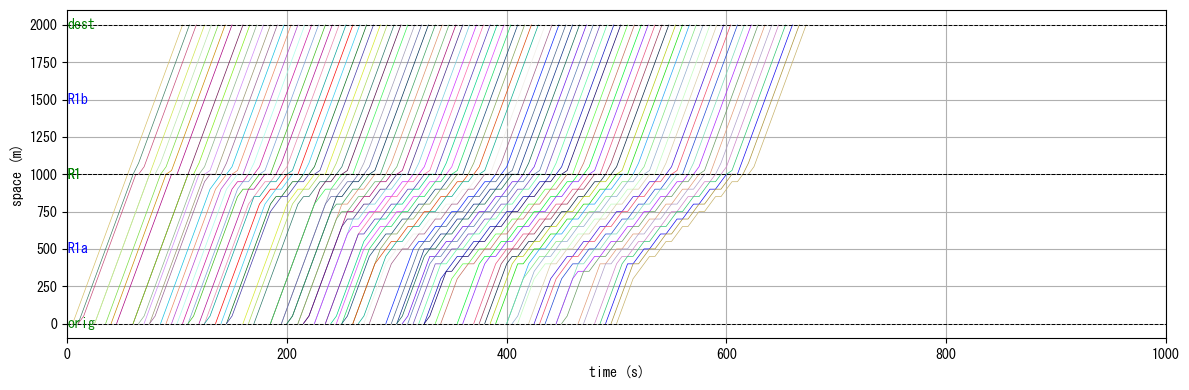

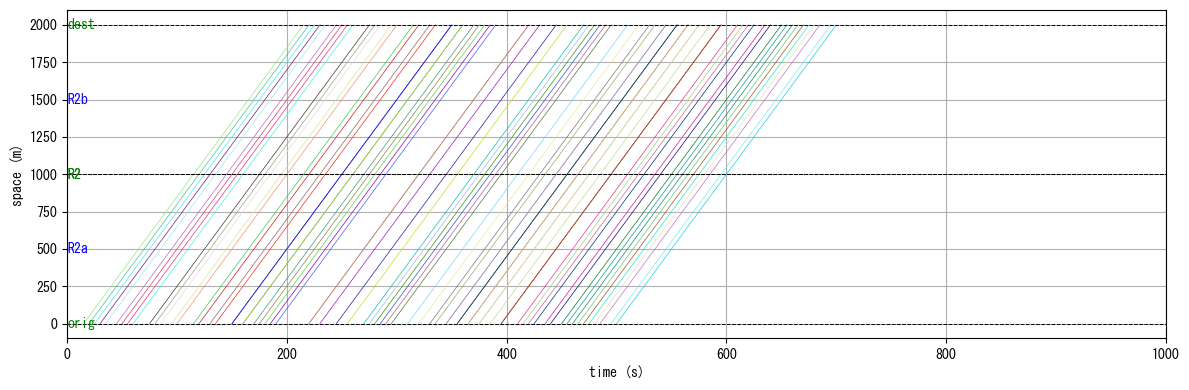

In [9]:

# Run the simulation to the end
W.exec_simulation()

# Print summary of simulation result
W.analyzer.print_simple_stats()

df_link = W.analyzer.link_to_pandas()
r1_users = df_link["traffic_volume"][df_link["link"] == "R1a"].values[0]
r2_users = df_link["traffic_volume"][df_link["link"] == "R2a"].values[0]
print(f"Total travel time: {W.analyzer.total_travel_time} s")
print(f"Route 1 users: {r1_users}")
print(f"Route 2 users: {r2_users}")

# Visualize 
W.analyzer.time_space_diagram_traj_links([route1, route2])

## Optimal routing

There may exist the optimal routing of vehicles that minimizes the system total travel time. It is called *Dynamic System Optimum (DSO)*.

In this example, we derive near-DSO solution by using the genetic algorithm implemented by [DEAP package](https://github.com/DEAP/deap) (This is not very efficient approach for deriving the DSO routing, but we just use it for simplicity).

Total travel time: 176800.0 s
Route 1 users: 495
Route 2 users: 305


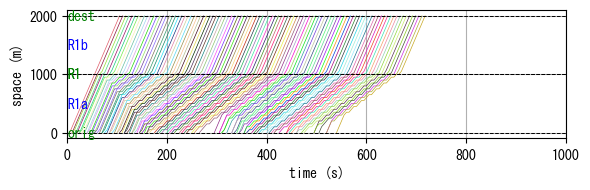

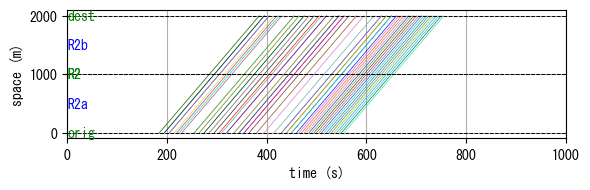

129600.0 131175.0 131775.0 132950.0 136300.0 132050.0 129700.0 128475.0 148500.0 133750.0 131525.0 128875.0 125750.0 128975.0 130275.0 132750.0 132050.0 129850.0 127325.0 128900.0 -- Generation 0 --
129875.0 129375.0 128750.0 131675.0 127525.0 129125.0 127400.0 128100.0 127825.0 129400.0 130300.0 132000.0 128575.0 
Best individual:  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
Fitness:  -125750.0
 Total travel time: 125750.0 s
 Route 1 users: 405
 Route 2 users: 395
-- Generation 1 --
133625.0 128425.0 130975.0 126875.0 131700.0 128575.0 127400.0 129175.0 12

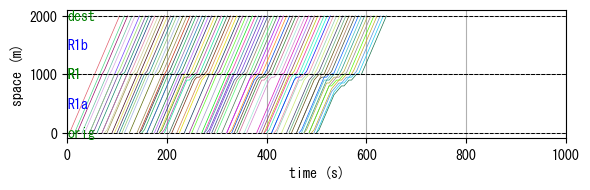

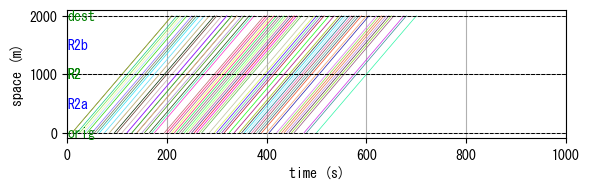

In [10]:
import random
from deap import base, creator, tools, algorithms
from uxsim import *


##############################################################
# Define UXsim World
W = World(
    name="", 
    deltan=5, 
    tmax=1000,
    print_mode=0, save_mode=1, show_mode=1, #print is off, otherwise it will be very verbose during the genetic algorithm
    random_seed=None,
    duo_update_time=60
)

# Define the scenario
#network configuration
# O -- R1
# |     |
# R2 -- D
#route with R1 is faster but narrower than R2

W.addNode("orig", 0, 0)
W.addNode("R1", 1, 0)
W.addNode("R2", 0, 1)
W.addNode("dest", 1, 1)
W.addLink("R1a", "orig", "R1", length=1000, free_flow_speed=20, number_of_lanes=2)
W.addLink("R1b", "R1", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("R2a", "orig", "R2", length=1000, free_flow_speed=10, number_of_lanes=2)
W.addLink("R2b", "R2", "dest", length=1000, free_flow_speed=10, number_of_lanes=2)
W.adddemand("orig", "dest", 0, 500, 0.8*2)

route1 = ["R1a", "R1b"]
route2 = ["R2a", "R2b"]

W_orig = W.copy()

##############################################################
# Compute DUO as a reference
W.exec_simulation()

df_link = W.analyzer.link_to_pandas()
r1_users = df_link["traffic_volume"][df_link["link"] == "R1a"].values[0]
r2_users = df_link["traffic_volume"][df_link["link"] == "R2a"].values[0]
print(f"Total travel time: {W.analyzer.total_travel_time} s")
print(f"Route 1 users: {r1_users}")
print(f"Route 2 users: {r2_users}")
W.analyzer.time_space_diagram_traj_links([route1, route2], figsize=(6,2))

W_duo = W.copy()

##############################################################
# Prepare genetic algorithm using DEAP
# evaluate fitness by total travel time
def evaluate_by_total_travel_time(W):
    W.exec_simulation()
    print(W.analyzer.total_travel_time, end=" ")
    return - W.analyzer.total_travel_time,

# specify routing based on genome
def specify_routes(W, genome):
    veh_list = list(W.VEHICLES.values())
    for i, value in enumerate(genome):
        veh = veh_list[i]
        if value == 1:
            veh.set_links_prefer(route1)
        elif value == 0:
            veh.set_links_prefer(route2)
        else:
            raise ValueError("Invalid genome value")

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Initialize the individual
n_gene = len(W.VEHICLES)
toolbox.register("attr_gene", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=n_gene)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation, crossover, and mutation functions
toolbox.register("evaluate", evaluate_by_total_travel_time)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

##############################################################
# Execute genetic algorithm
NPOP = 20
CXPB, MUTPB, NGEN = 0.5, 0.2, 20

# Initial population
pop = toolbox.population(n=NPOP) 
for ind in pop:
    W = W_orig.copy()
    specify_routes(W, ind)
    ind.W = W
fitnesses = list(map(toolbox.evaluate, [ind.W for ind in pop]))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

for g in range(NGEN):
    print(f"-- Generation {g} --")
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    # Crossover and mutation
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    for ind in invalid_ind:
        W = W_orig.copy()
        specify_routes(W, ind)
        ind.W = W
    fitnesses = map(toolbox.evaluate, [ind.W for ind in invalid_ind])
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Print the best individual
    best_ind = tools.selBest(pop, 1)[0]
    print("")
    print("Best individual: ", best_ind)
    print("Fitness: ", best_ind.fitness.values[0])
    df_link = best_ind.W.analyzer.link_to_pandas()
    r1_users = df_link["traffic_volume"][df_link["link"] == "R1a"].values[0]
    r2_users = df_link["traffic_volume"][df_link["link"] == "R2a"].values[0]
    print(f" Total travel time: {best_ind.W.analyzer.total_travel_time} s")
    print(f" Route 1 users: {r1_users}")
    print(f" Route 2 users: {r2_users}")
    #best_ind.W.analyzer.time_space_diagram_traj_links([route1, route2], figsize=(6,2))

    # Update the population
    pop[:] = offspring

best_ind = tools.selBest(pop, 1)[0]
print("")
print("Best individual: ", best_ind)
print("Fitness: ", best_ind.fitness.values[0])
best_ind.W.analyzer.time_space_diagram_traj_links([["R1a", "R1b"], ["R2a", "R2b"]], figsize=(6,2))


Text(0, 0.5, 'travel time of each vehicle in DSO (s)')

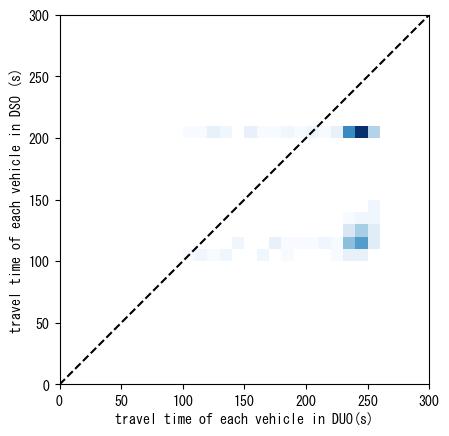

In [13]:
vehs_duo = list(W_duo.VEHICLES.values())
vehs_dso = list(best_ind.W.VEHICLES.values())

figure()
subplot(111, aspect="equal")
hist2d([veh.travel_time for veh in vehs_duo], [veh.travel_time for veh in vehs_dso], bins=30, range=[[0,300],[0,300]], cmap="Blues", cmin=1)
plot([0, 300], [0, 300], "--k")
xlabel("travel time of each vehicle in DUO(s)")
ylabel("travel time of each vehicle in DSO (s)")